In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data=pd.read_csv("../data/preprocessed_data.csv")

In [11]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,393,6.4,1872,67,1122,40,0,4
1,2,OnePlus 9,0,268,4.7,1331,42,944,47,1,3
2,3,Xiaomi Mi 11,0,154,4.0,761,32,322,42,0,2
3,4,Google Pixel 5,0,239,4.8,1676,56,871,20,0,3
4,5,iPhone 12,1,187,4.3,1367,58,988,31,1,3


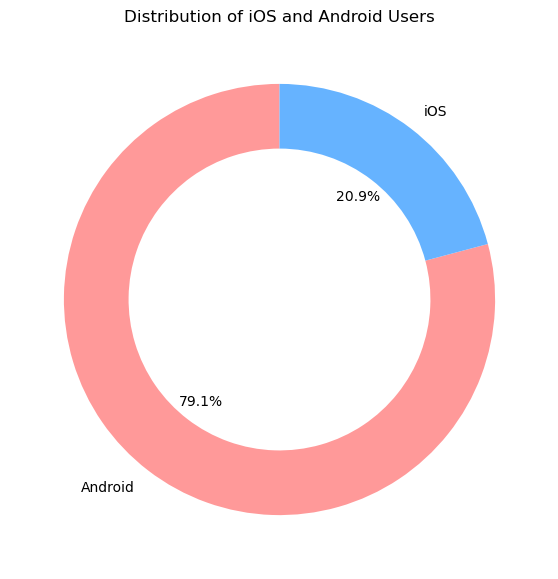

In [12]:
data["Operating System"] = data["Operating System"].map({0: "Android", 1: "iOS"})

# Count the number of iOS and Android users
os_counts = data["Operating System"].value_counts()

# Create a ring chart (doughnut chart)
plt.figure(figsize=(7, 7))

# Plot the pie chart with a hole in the middle to create a ring chart
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff"], wedgeprops={'width': 0.3})

# Set title
plt.title("Distribution of iOS and Android Users")
plt.savefig("../visualizations/os_distribution.png")
# Display the chart
plt.show()


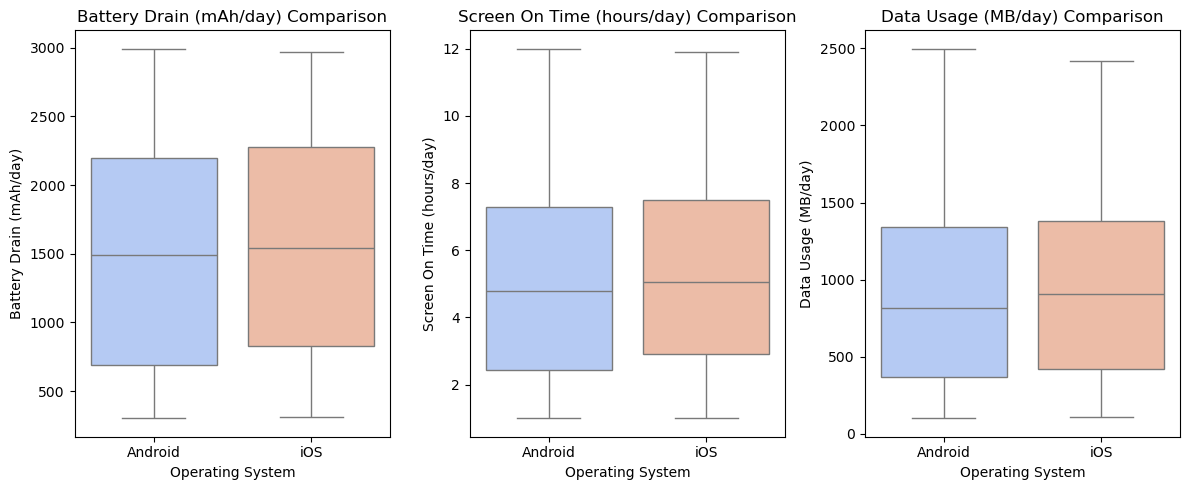

In [13]:


features = ["Battery Drain (mAh/day)", "Screen On Time (hours/day)", "Data Usage (MB/day)"]

plt.figure(figsize=(12, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data["Operating System"], y=data[feature], hue=data["Operating System"], legend=False, palette="coolwarm")
    plt.title(f"{feature} Comparison")
    plt.xlabel("Operating System")
    plt.ylabel(feature)
    
    # Set the x-axis labels to 0 for Android and 1 for iOS
    plt.xticks(ticks=[0, 1], labels=["Android", "iOS"])
    
    plt.savefig("../visualizations/os_boxplot.png")


plt.tight_layout()

plt.show()

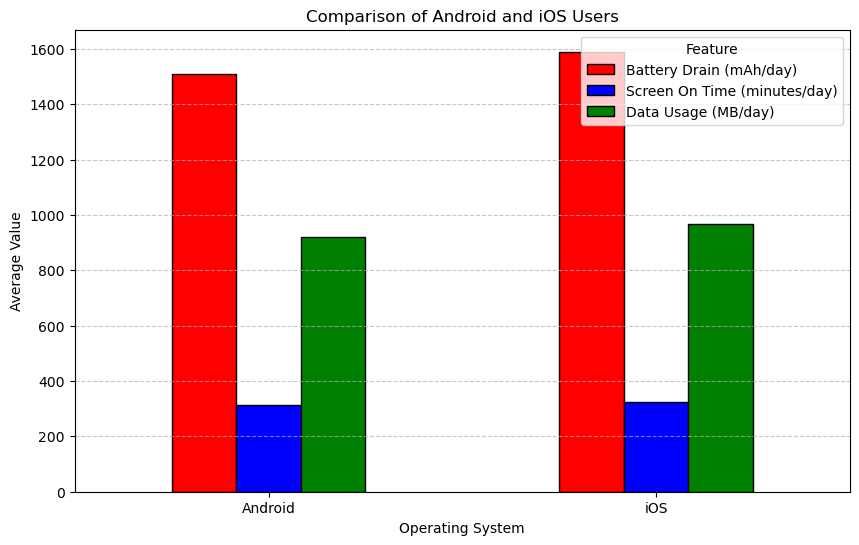

In [16]:
# Compute mean values
data["Screen On Time (minutes/day)"] = data["Screen On Time (hours/day)"] * 60
features = ["Battery Drain (mAh/day)", "Screen On Time (minutes/day)", "Data Usage (MB/day)"]
mean_values = data.groupby("Operating System")[features].mean()


# Plot grouped bar chart
colors = ["red", "blue", "green", "purple", "orange"]
ax = mean_values.plot(kind="bar", figsize=(10, 6), color=colors, edgecolor="black")

plt.title("Comparison of Android and iOS Users")
plt.xlabel("Operating System")
plt.ylabel("Average Value")
plt.xticks(ticks=[0, 1], labels=["Android", "iOS"], rotation=0)  # Manually set labels
plt.legend(title="Feature")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("../visualizations/os_type_bar.png")
plt.show()


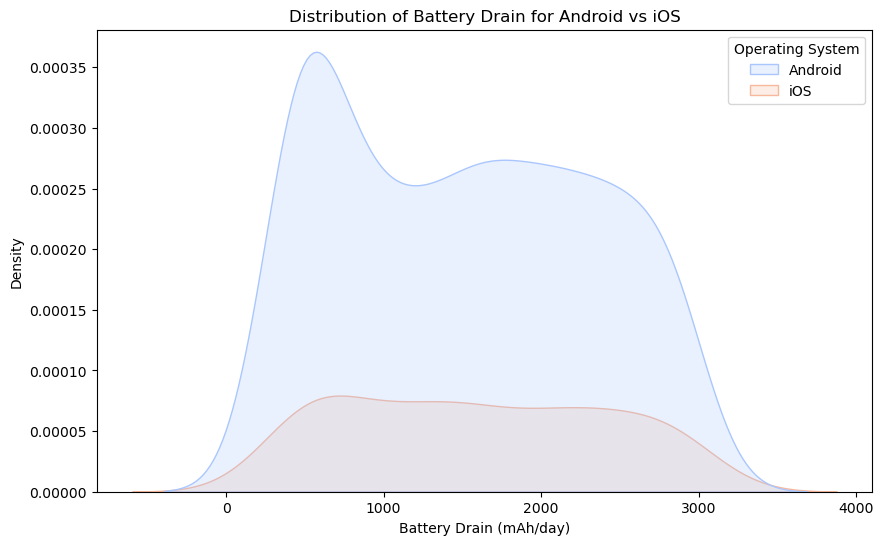

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Battery Drain (mAh/day)', hue='Operating System', palette='coolwarm', fill=True)
plt.title('Distribution of Battery Drain for Android vs iOS')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.savefig("../visualizations/os_battery_kde.png")
plt.show()

## t-Test Analysis: Comparison of Android and iOS Users

### Overview

In this analysis, **t-tests** are conducted to compare various mobile usage features between **Android** and **iOS** users. The goal is to determine if there are any **significant differences** between the two groups for the following features:

- **Battery Drain (mAh/day)**
- **Screen On Time (hours/day)**
- **Data Usage (MB/day)**
- **Number of Apps Installed**
 
 ### Hypotheses

#### Null Hypothesis (H₀):
There is **no significant difference** between Android and iOS users for each feature.

#### Alternative Hypothesis (H₁):
There is a **significant difference** between Android and iOS users for each feature.

##### The p-value from the t-test will help us determine whether to accept or reject the null hypothesis.

- If p-value < 0.05, we reject the null hypothesis, meaning there is a significant difference between Android and iOS users for the given feature.
- If p-value ≥ 0.05, we fail to reject the null hypothesis, meaning there is no significant difference between Android and iOS users for the given feature.

In [ ]:
from scipy.stats import ttest_ind

# Define the features to compare
features = ["Battery Drain (mAh/day)", "Screen On Time (hours/day)", "Data Usage (MB/day)", "Number of Apps Installed"]

# Separate Android and iOS users
android_users = data[data["Operating System"] == 0]
ios_users = data[data["Operating System"] == 1]

# Perform t-tests for each feature
for feature in features:
    t_stat, p_value = ttest_ind(android_users[feature], ios_users[feature], equal_var=False)  # Welch’s t-test
    print(f"\nFeature: {feature}")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")
    
    if p_value < 0.05:
        print("→ Significant difference between Android and iOS users ")
    else:
        print("→ No significant difference between Android and iOS users ")


Feature: Battery Drain (mAh/day)
T-statistic: -1.069, P-value: 0.28620
→ No significant difference between Android and iOS users 

Feature: Screen On Time (hours/day)
T-statistic: -0.717, P-value: 0.47381
→ No significant difference between Android and iOS users 

Feature: Data Usage (MB/day)
T-statistic: -0.772, P-value: 0.44072
→ No significant difference between Android and iOS users 

Feature: Number of Apps Installed
T-statistic: -1.029, P-value: 0.30472
→ No significant difference between Android and iOS users 
